In [1]:
import tensorflow as tf
import numpy as np

encoder = tf.keras.models.load_model("../Models/encoder_250_dropout_wmse.keras")


2025-09-20 19:56:10.346908: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-20 19:56:19.907424: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-20 19:56:19.923034: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 539992000 exceeds 10% of free system memory.
2025-09-20 19:56:20.022334: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 539992000 exceeds 10% of free system memory.
2025-09-20 19:56:20.094590: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 539992000 exceeds 10% of free system memory.
2025-09-20 19:56:20.950705: W external/local_xla/

In [2]:
X = np.load("../Data/LPS/sal_rand_x.npy")
# Y = np.load("../Data/LPS/sal-lps-150-1500(labeled)_fulltest_labels.npy")
# X = np.load("../Data/LPS/sal-lps-150-1500(labeled)_data.npy")
# Y = np.load("../Data/LPS/sal-lps-150-1500(labeled)_labels.npy")
X = encoder.predict(X)
del encoder

 2/52 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step 

2025-09-20 19:56:21.606145: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 447383372 exceeds 10% of free system memory.


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step


In [3]:
print(X.shape)
classifier = tf.keras.models.load_model("../Models/classifier_250_wmse.keras")
y_pred_probs = classifier(X)
y_pred = np.argmax(y_pred_probs,axis=1)




(1657, 250)


In [4]:
print(y_pred[100:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


TN: 1589, FP: 68, FN: 0, TP: 0


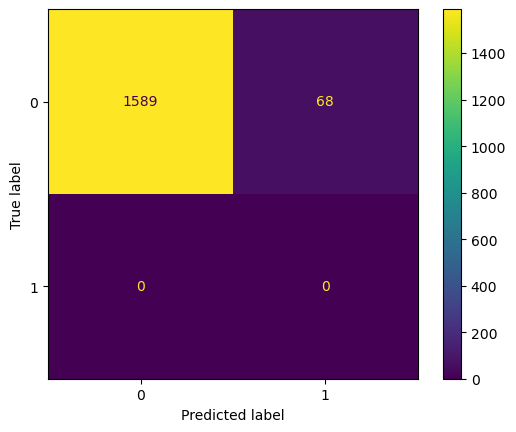

Test Accuracy: 0.9590
Precision: 0.0000
Recall (Sensitivity/TPR): 0.0000
Specificity (TNR): 0.9590
F1-Score: 0.0000
False Positive Rate (FPR): 0.0410
False Negative Rate (FNR): nan
Negative Predictive Value (NPV): 1.0000


/home/vmuser/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/tmp/ipykernel_129367/1805616691.py:34: RuntimeWarning: invalid value encountered in scalar divide
  false_negative_rate = fn / (fn + tp)
/tmp/ipykernel_129367/1805616691.py:35: RuntimeWarning: invalid value encountered in scalar divide
  true_positive_rate = tp / (tp + fn)  # Same as recall/sensitivity


In [5]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
Y = np.zeros(len(X))

cm = confusion_matrix(Y, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

if len(np.unique(Y)) == 2:
    auc = roc_auc_score(Y, y_pred_probs[:, 1])
    print(f'AUC: {auc}')
    fpr, tpr, thresholds = roc_curve(Y, y_pred_probs[:, 1])
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
# print(f'Test loss: {loss}')
accuracy = np.mean(y_pred == Y)
print(f'Test Accuracy: {accuracy:.4f}')

precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)
f1 = f1_score(Y, y_pred)
specificity = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)
true_positive_rate = tp / (tp + fn)  # Same as recall/sensitivity
negative_predictive_value = tn / (tn + fn)

print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity/TPR): {recall:.4f}')
print(f'Specificity (TNR): {specificity:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'False Positive Rate (FPR): {false_positive_rate:.4f}')
print(f'False Negative Rate (FNR): {false_negative_rate:.4f}')
print(f'Negative Predictive Value (NPV): {negative_predictive_value:.4f}')
